**Студент**: Савин Александр Андреевич  
**Группа**: М80-114М-23  
**Лабороторная работа номер 2**

Глобальная оптимизация и метаэврестические алгоритмы
- В Pygmo запрогроммировать две своих тестовых функции и найти их оптимум 3 разными алгоритмами доступными в библиотеке и получить таблицу сравнения


In [ ]:
!pip install pygmo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 49.9 MB/s eta 0:00:00


In [ ]:
import pygmo as pg
import numpy as np

from matplotlib import pyplot as plt
from numpy import linalg as la
import matplotlib.animation as animation
import autograd
import math
import random
from abc import ABCMeta, abstractmethod

from scipy.optimize import minimize
from sympy import *

In [ ]:
class Func():
    @abstractmethod
    def full_func_draw(self, step = 0.05):
        f = plt.figure()
        f.set_figwidth(6)
        f.set_figheight(6)
        x = np.arange(self.left_x, self.right_x, step)
        y = np.arange(self.left_y, self.right_y, step)
        X, Y = np.meshgrid(x, y)
        Z = self.fitness([X, Y])[0]

        ax = plt.subplot(projection="3d")
        ax.plot_surface(X, Y, Z, cmap="viridis")
        plt.show()

**Функция Бута**

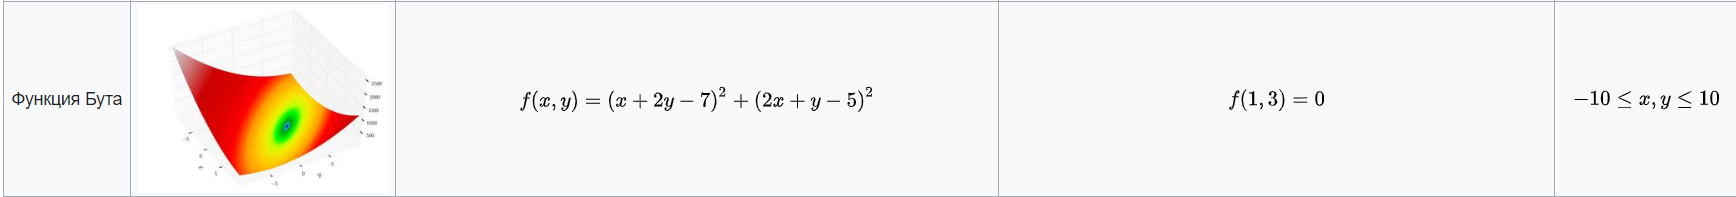

In [ ]:
class Booth(Func):
    def __init__(self):
        self.dim = 2
        self.left_x, self.right_x = -10, 10
        self.left_y, self.right_y = -10, 10
        self.min_xyz = np.array([1, 3, 0])

    def get_bounds(self):
        return ([self.left_x, self.left_y], [self.right_x, self.right_y])

    def get_name(self):
        return "Booth Function"

    def get_extra_info(self):
        return "\tDim: " + str(self.dim)

    def fitness(self, x):
        return [(x[0] + 2 * x[1] - 7) ** 2 + (2 * x[0] + x[1] - 5) ** 2]

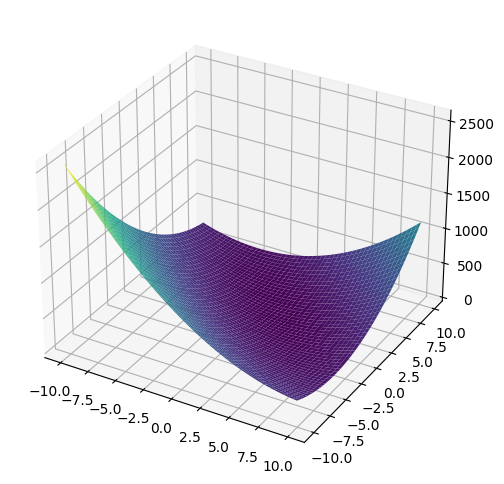

In [ ]:
booth_func = Booth()
booth_func.full_func_draw()

**Функция Матьяса**

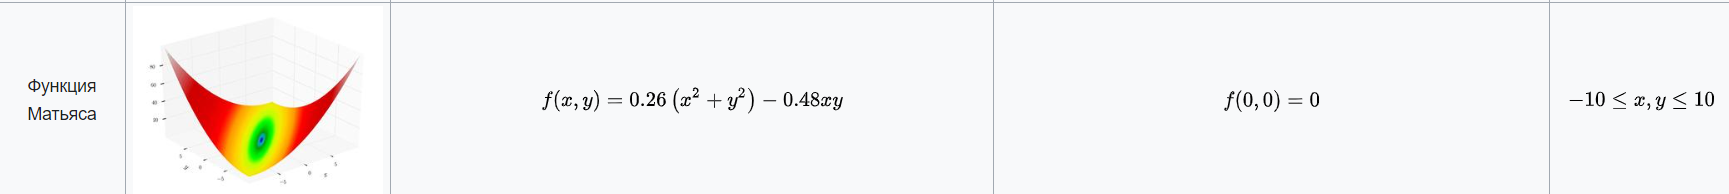

In [ ]:
class Matyas(Func):
    def __init__(self):
        self.dim = 2
        self.left_x, self.right_x = -10, 10
        self.left_y, self.right_y = -10, 10
        self.min_xyz = np.array([0, 0, 0])

    def get_bounds(self):
        return ([self.left_x, self.left_y], [self.right_x, self.right_y])

    def get_name(self):
        return "Matyas Function"

    def get_extra_info(self):
        return "\tDim: " + str(self.dim)

    def fitness(self, x):
        return [0.26 * (x[0] ** 2 + x[1] ** 2) - 0.48 * x[0] * x[1]]

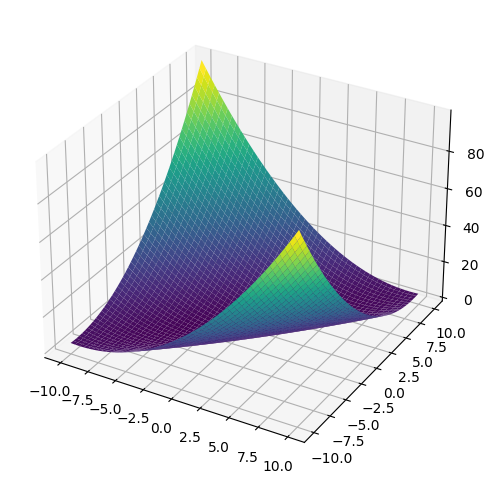

In [ ]:
matyas_func = Matyas()
matyas_func.full_func_draw()

-----

In [16]:
algorithms = [
    pg.bee_colony(gen = 1000, limit = 1000, seed = 10),
    pg.pso_gen(gen = 100, seed = 10),
    pg.de(gen = 100),
    pg.gwo(gen = 1000, seed = 10),
    pg.sea(gen = 1000, seed = 10)]
for algo in algorithms:
    print(pg.algorithm(algo))

Algorithm name: ABC: Artificial Bee Colony [stochastic]
	C++ class name: pagmo::bee_colony

	Thread safety: basic

Extra info:
	Maximum number of generations: 1000
	Limit: 1000
	Verbosity: 0
	Seed: 10
Algorithm name: GPSO: Generational Particle Swarm Optimization [stochastic]
	C++ class name: pagmo::pso_gen

	Thread safety: basic

Extra info:
	Generations: 100
	Omega: 0.7298
	Eta1: 2.05
	Eta2: 2.05
	Maximum velocity: 0.5
	Variant: 5
	Topology: 2
	Topology parameter: 4
	Memory: false
	Seed: 10
	Verbosity: 0
Algorithm name: DE: Differential Evolution [stochastic]
	C++ class name: pagmo::de

	Thread safety: basic

Extra info:
	Generations: 100
	Parameter F: 0.800000
	Parameter CR: 0.900000
	Variant: 2
	Stopping xtol: 0.000001
	Stopping ftol: 0.000001
	Verbosity: 0
	Seed: 473548991
Algorithm name: GWO: Grey Wolf Optimizer [stochastic]
	C++ class name: pagmo::gwo

	Thread safety: basic

Extra info:
	Generations: 1000
	Verbosity: 0
	Seed: 10
Algorithm name: SEA: (N+1)-EA Simple Evolutionary 

In [26]:
def examine_function(function_info: callable, algorithms) -> None:
    colors_ = lambda n: list(map(lambda i: "#" + "%06x" % random.randint(0, 0xFFFFFF),range(n)))
    colors = colors_(len(algorithms))

    fig = plt.figure(figsize = (10, 10))

    for i in range(len(algorithms)):
        algo = pg.algorithm(algorithms[i])
        algo.set_verbosity(100)
        print(algo)
        prob = pg.problem(function_info)
        pop = pg.population(prob, size = 10)
        print(pop)
        pop = algo.evolve(pop)
        uda = algo.extract(type(algorithms[i]))
        log = uda.get_log()
        plt.semilogy([entry[0] for entry in log],[entry[2]for entry in log],
                     'k--', label=algo.get_name(), c = colors[i])
        print(pop)

    plt.legend(loc="upper left")

Algorithm name: ABC: Artificial Bee Colony [stochastic]
	C++ class name: pagmo::bee_colony

	Thread safety: basic

Extra info:
	Maximum number of generations: 1000
	Limit: 1000
	Verbosity: 100
	Seed: 10
Problem name: Booth Function
	C++ class name: pybind11::object

	Global dimension:			2
	Integer dimension:			0
	Fitness dimension:			1
	Number of objectives:			1
	Equality constraints dimension:		0
	Inequality constraints dimension:	0
	Lower bounds: [-10, -10]
	Upper bounds: [10, 10]
	Has batch fitness evaluation: false

	Has gradient: false
	User implemented gradient sparsity: false
	Has hessians: false
	User implemented hessians sparsity: false

	Fitness evaluations: 10

	Thread safety: none

Extra info:
	Dim: 2
Population size: 10

List of individuals: 
#0:
	ID:			609775604285628531
	Decision vector:	[7.44839, -0.0477432]
	Fitness vector:		[97.128]
#1:
	ID:			1168293714975317177
	Decision vector:	[4.5547, 7.23823]
	Fitness vector:		[273.518]
#2:
	ID:			10316529777164566171
	Decision 

<ipython-input-26-91dbed96d776>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.semilogy([entry[0] for entry in log],[entry[2]for entry in log],


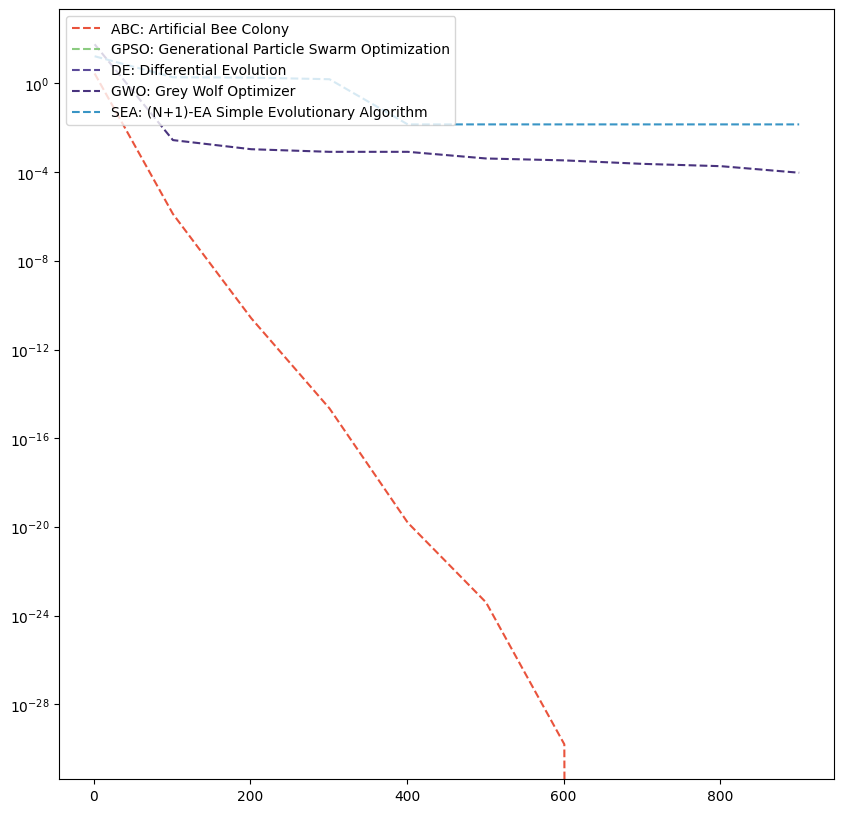

In [27]:
examine_function(Booth(), algorithms)

Algorithm name: ABC: Artificial Bee Colony [stochastic]
	C++ class name: pagmo::bee_colony

	Thread safety: basic

Extra info:
	Maximum number of generations: 1000
	Limit: 1000
	Verbosity: 100
	Seed: 10
Problem name: Matyas Function
	C++ class name: pybind11::object

	Global dimension:			2
	Integer dimension:			0
	Fitness dimension:			1
	Number of objectives:			1
	Equality constraints dimension:		0
	Inequality constraints dimension:	0
	Lower bounds: [-10, -10]
	Upper bounds: [10, 10]
	Has batch fitness evaluation: false

	Has gradient: false
	User implemented gradient sparsity: false
	Has hessians: false
	User implemented hessians sparsity: false

	Fitness evaluations: 10

	Thread safety: none

Extra info:
	Dim: 2
Population size: 10

List of individuals: 
#0:
	ID:			1135116575708683782
	Decision vector:	[2.63312, 7.74848]
	Fitness vector:		[7.6195]
#1:
	ID:			13819066160521312582
	Decision vector:	[3.76566, -2.22278]
	Fitness vector:		[8.98915]
#2:
	ID:			4150808574535617021
	Decision

<ipython-input-26-91dbed96d776>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.semilogy([entry[0] for entry in log],[entry[2]for entry in log],


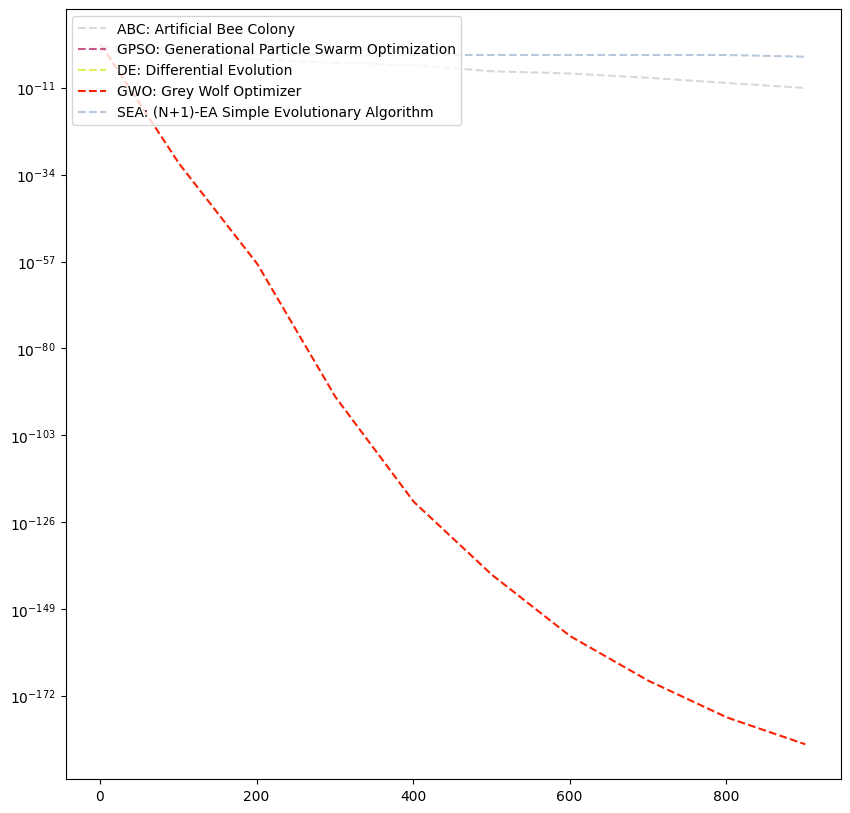

In [28]:
examine_function(Matyas(), algorithms)